# Generate dataset

Here we generate white 128x128 pictures with drawn rectangles. Width of each rectangle border varies between 1pix and 5pix as well as number of rectangles per image (1 to 5). 

Also, all pictures randomly rotated between -10 and 10 degrees.


In [1]:
import cv2
import random
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

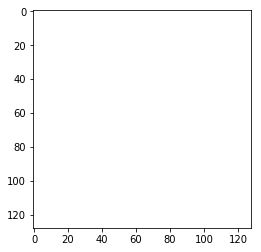

In [2]:
# example plain white
width = 128
height = 128

img = np.zeros([width, height, 3], dtype=np.uint8)
img.fill(255)

cv2.imwrite('test.jpg', img)

plt.imshow(img)  
plt.show()

## Helper functions

In [3]:
# draw black rectangle
def random_rectangle(img):
    # set (x1, y1) (x2, y2) for rectangle top left and bottom right corners
    left_x = img.shape[1] // 2
    right_x = img.shape[1]
    top_y = 0
    bottom_y = img.shape[0]
    while (right_x - left_x < bottom_y - top_y):
        # set left/right x coordinate between 10 and 118 pix
        left_x = random.randint(10, img.shape[1]//2 - 5)
        right_x = random.randint(img.shape[1]//2 + 5, img.shape[1] - 10)
        # set top/bottom y coordinate between 10 and 118 pix
        top_y = random.randint(10, img.shape[0]//2 - 5)
        bottom_y = random.randint(img.shape[0]//2 + 5, img.shape[0] - 10)        
    # draw rectangle
    return cv2.rectangle(img, (left_x, top_y), (right_x, bottom_y), (0,0,0), int(random.uniform(1, 5)))

# rotate image between -angle, angle
def random_rotation(img):
    # set range
    angles = 11
    angle = int(random.uniform(-angles, angles))
    height, width, ch = img.shape
    shape = (width, height)
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, shape), angle

## Example of one generated image

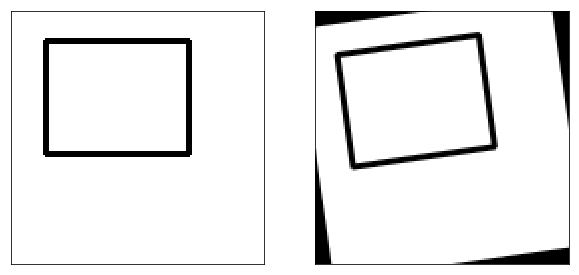

In [4]:
# example
img = mpimg.imread('test.jpg')
im = []
im.append(random_rectangle(img))
im_1, a = random_rotation(img)
im.append(im_1)

n_rows = 1
n_cols = 2
plt.figure(figsize=(10, 5))

for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    test = im[i]
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(test)

## Generate dataset of 11000 training pictures

In [5]:
def draw_and_rotate(img, index, path, data):
    
    # draw black rectangle of 5 pixels width 
    img = random_rectangle(img)

    # randomly rotate image
    img, angle = random_rotation(img)

    # save image
    cv2.imwrite('./{}/sample{}.jpg'.format(path, index), img)

    # save data for csv log
    data['image'].append('./{}/sample{}.jpg'.format(path, index))
    data['angle'].append(angle)

# create one samle image
def create_sample(index, data, category):
    # set WxH of image
    width = 128
    height = 128
    
    img = np.zeros([width, height, 3], dtype=np.uint8)
    img.fill(255)
    
    draw_and_rotate(img, index, category, data)

In [6]:
# set number of samples to create
# 2000 training set, 600 validation set, 500 test set 
num_of_samples_train = 2000 + 600
num_of_samples_test = 500

In [7]:
# generate samples

# empty data dict for csv log
data_train = {'image':[], 'angle':[]}
data_test = {'image':[], 'angle':[]}

# Go!
# training set
for i in range(num_of_samples_train):
    create_sample(i, data_train, 'data_train_simple')
    
# training set
for i in range(num_of_samples_test):
    create_sample(i, data_test, 'data_test_simple')

## Save to csv file ['angle', 'path/to/image', 'sin', 'cos']

In [8]:
# create pandas DF
samples_data_train = pd.DataFrame(data_train)
samples_data_test = pd.DataFrame(data_test)

In [9]:
samples_data_train.to_csv('datalog_train_simple.csv', index=False)
samples_data_test.to_csv('datalog_test_simple.csv', index=False)

In [10]:
# read csv logs and check if everything ok
rows = pd.read_csv('datalog_train_simple.csv')
rows.describe()

,angle
count,2600.000000
mean,-0.148077
std,5.888995
min,-10.000000
25%,-5.000000
50%,0.000000
75%,5.000000
max,10.000000


## Check

Number of samples:    2600
Shape of the images:  (128, 128, 3)


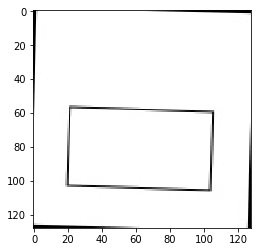

In [11]:
# load samples
samples = []
for img in glob.glob('./data_train_simple/*.jpg'):
    image = mpimg.imread(img)
    samples.append(image)

print("Number of samples:   ", len(samples))
print("Shape of the images: ", samples[0].shape)
plt.imshow(samples[0], cmap='gray')
plt.show()